Import TensorFlow and other libraries

In [1]:
import tensorflow as tf

import numpy as np
import os
import time

C:\Users\Dhrumil\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Open and read the file with explicit encoding
file_path = 'eminem.txt'

try:
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
        print(content)
except FileNotFoundError:
    print(f"The file {file_path} was not found.")
except Exception as e:
    print(f"An error occurred: {str(e)}")


 shshsh shady aftermath haha gggg gunit haha   cause we came here to set this party off right lets bounce tonight and if they dont let us in through the front well come through the side cause i dont ever wanna leave the game without at least saying goodbye so all my people on the left all my people on the right swing one last time   get your ass up for the doctor one more time get your ass up for the doctor come on now here we go cliff hanger its another club banger got ya hangin on the edge of your seat get on down   times up games over you lose i win bout to show these knuckleheads how to do this here oh yeah new year next phase begin look whos got you goin crazy again im a trend i set one every time im in i go out and just come back full circle again you a fad that means you something that we already had but once youre gone you dont come back oh too bad youre off the map now radar cant even find you we stay on the grind you slip we outgrind you you walk around mad you let your anger

Read the data
First, look in the text

In [3]:
# Read, then decode for py2 compat.
text = open(file_path, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')

Length of text: 1668013 characters


In [4]:
# Take a look at the first 250 characters in text
print(text[:250])

 shshsh shady aftermath haha gggg gunit haha   cause we came here to set this party off right lets bounce tonight and if they dont let us in through the front well come through the side cause i dont ever wanna leave the game without at least saying g


In [5]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

41 unique characters


Basic Statistics:
                                                   Lyrics
count                                                   1
unique                                                  1
top      shshsh shady aftermath haha gggg gunit haha  ...
freq                                                    1

Number of Lines in the Lyrics: 1


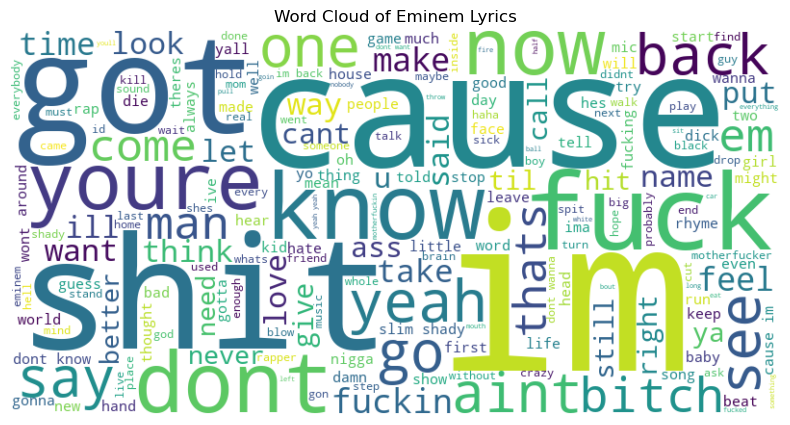

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the lyrics from the text file
with open('eminem.txt', 'r', encoding='utf-8') as file:
    lyrics = file.read()

# Split the lyrics into lines
lines = lyrics.split('\n')

# Create a DataFrame for analysis
df = pd.DataFrame(lines, columns=['Lyrics'])

# Basic statistics about the lyrics
print("Basic Statistics:")
print(df.describe())

# Number of lines in the lyrics
print("\nNumber of Lines in the Lyrics:", len(lines))

# Word Cloud to visualize most frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lyrics)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Eminem Lyrics')
plt.show()



Top 10 Most Frequent Words (excluding stop words):
im: 4689
like: 2974
dont: 2159
get: 2040
cause: 1711
got: 1680
shit: 1279
back: 1254
know: 1190
yeah: 1180


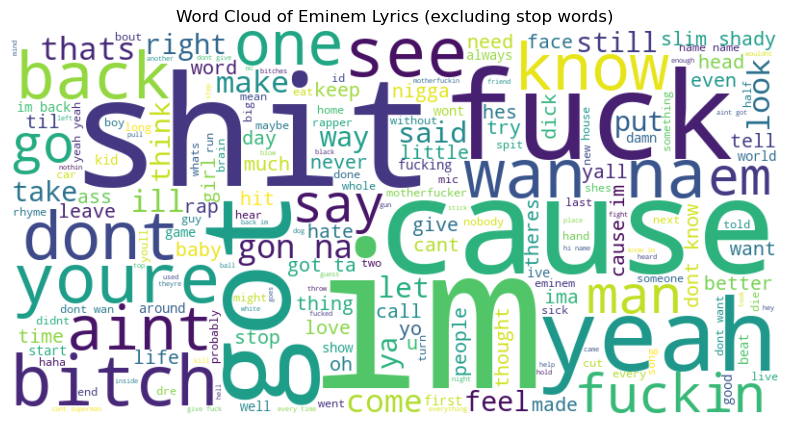

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Load the lyrics from the text file
with open('eminem.txt', 'r', encoding='utf-8') as file:
    lyrics = file.read()

# Tokenize the lyrics into words
tokens = word_tokenize(lyrics)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Count the frequency of each token
token_counts = Counter(filtered_tokens)

# Display the top N frequent tokens
top_n = 10
print(f"\nTop {top_n} Most Frequent Words (excluding stop words):")
for token, count in token_counts.most_common(top_n):
    print(f"{token}: {count}")

# Word Cloud to visualize most frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Eminem Lyrics (excluding stop words)')
plt.show()


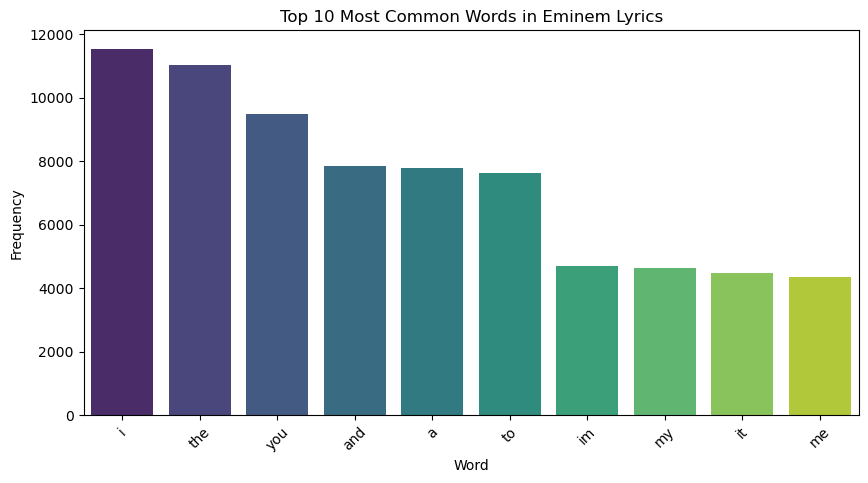

In [7]:
from collections import Counter
import seaborn as sns

# Tokenize the lyrics into words
words = lyrics.split()

# Calculate word frequency
word_freq = Counter(words)

# Plot the top N most common words
top_words = word_freq.most_common(10)
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 5))
sns.barplot(x='Word', y='Frequency', data=top_words_df, palette='viridis')
plt.title('Top 10 Most Common Words in Eminem Lyrics')
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dhrumil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dhrumil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Text(0, 0.5, 'Frequency')

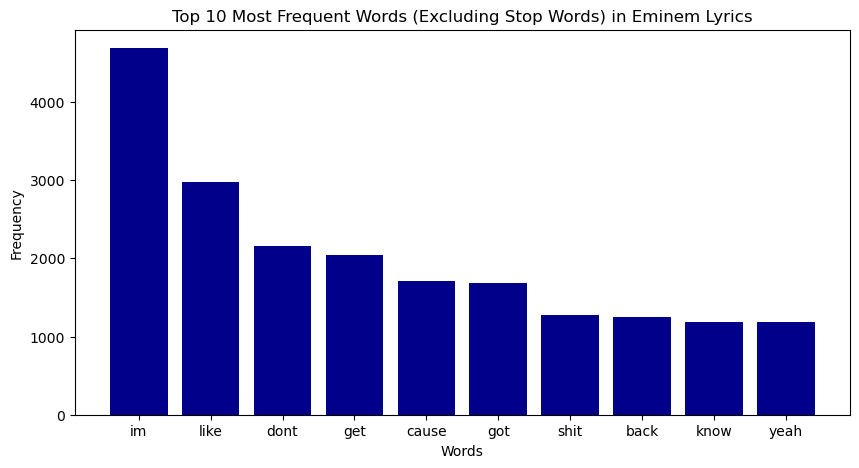

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stop words
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Load the lyrics from the text file
with open('eminem.txt', 'r', encoding='utf-8') as file:
    lyrics = file.read()

# Tokenize the lyrics into words
tokens = word_tokenize(lyrics)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]

# Count the frequency of each token
token_counts = Counter(filtered_tokens)

# Display the top N frequent tokens
top_n = 10
top_tokens = dict(token_counts.most_common(top_n))

# Plot a bar chart of the top N tokens
plt.figure(figsize=(10, 5))
plt.bar(top_tokens.keys(), top_tokens.values(), color='darkblue')
plt.title(f'Top {top_n} Most Frequent Words (Excluding Stop Words) in Eminem Lyrics')
plt.xlabel('Words')
plt.ylabel('Frequency')


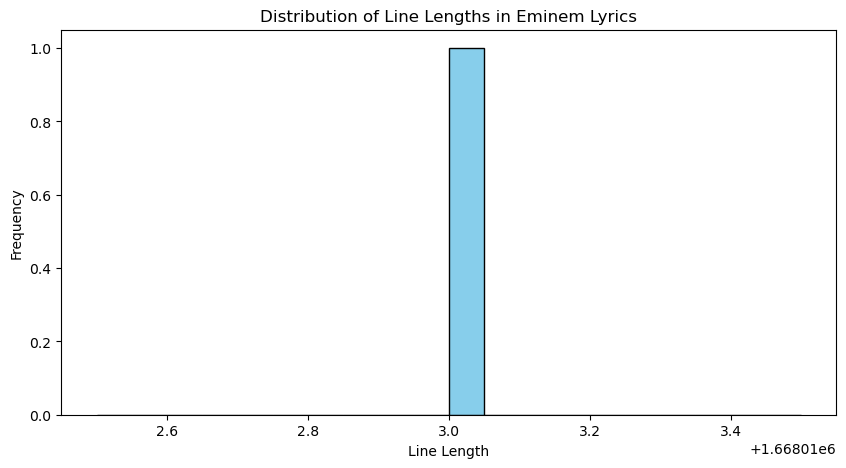

In [9]:
# Calculate the length of each line
line_lengths = [len(line) for line in lines]

# Plot a histogram of line lengths
plt.figure(figsize=(10, 5))
plt.hist(line_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Line Lengths in Eminem Lyrics')
plt.xlabel('Line Length')
plt.ylabel('Frequency')
plt.show()


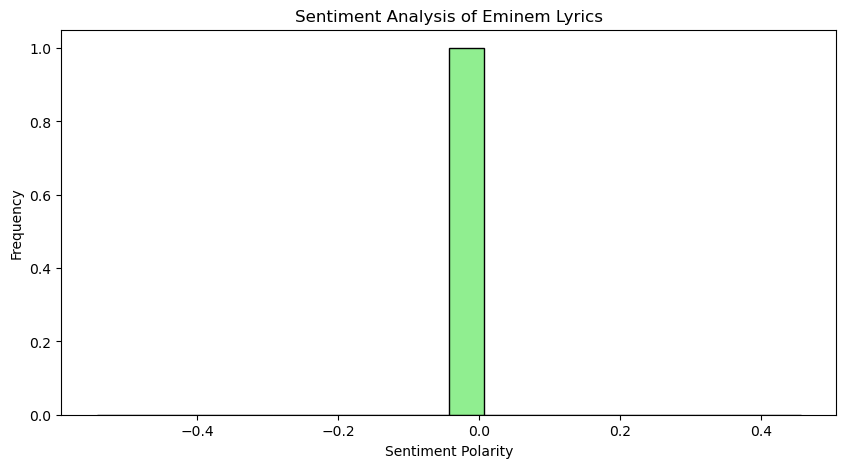

In [10]:
from textblob import TextBlob

# Calculate sentiment polarity for each line
sentiments = [TextBlob(line).sentiment.polarity for line in lines]

# Plot a histogram of sentiment polarity
plt.figure(figsize=(10, 5))
plt.hist(sentiments, bins=20, color='lightgreen', edgecolor='black')
plt.title('Sentiment Analysis of Eminem Lyrics')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


In [18]:
import nltk

In [20]:
# Download the VADER lexicon manually
nltk.download('vader_lexicon', download_dir='C:/Users/Dhrumil/Desktop/SJSU/data 228/Untitled Folder/nltk_data')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:/Users/Dhrumil/Desktop/SJSU/data 228/Untitled
[nltk_data]     Folder/nltk_data...


True

In [22]:
import nltk
import os

# Specify the path relative to the Jupyter Notebook directory
download_path = os.path.join('C:\\Users\\Dhrumil\\Desktop\\SJSU\\data 228\\Untitled Folder', 'nltk_data')

# Download the VADER lexicon manually
nltk.download('vader_lexicon', download_dir=download_path)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dhrumil\Desktop\SJSU\data 228\Untitled
[nltk_data]     Folder\nltk_data...


True

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dhrumil\AppData\Roaming\nltk_data...


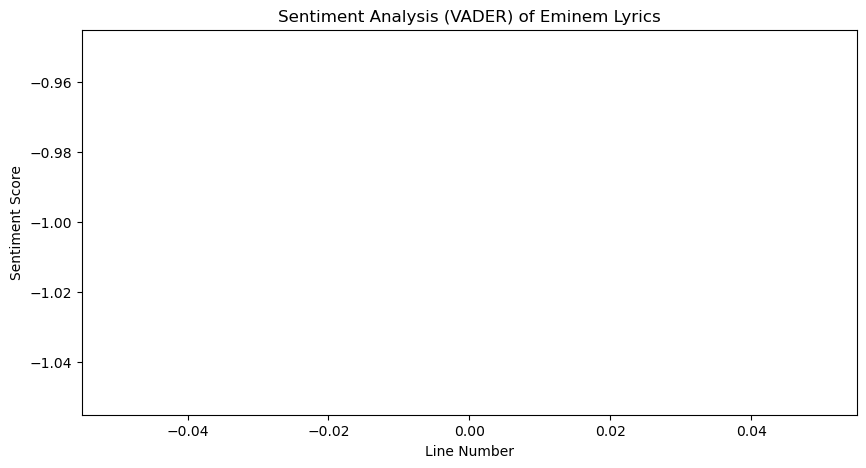

In [25]:
nltk.download('vader_lexicon')
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the lyrics from the text file
with open('eminem.txt', 'r', encoding='utf-8') as file:
    lyrics = file.read()

# Split the lyrics into lines
lines = lyrics.split('\n')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each line
sentiment_scores = [sia.polarity_scores(line)['compound'] for line in lines]

# Plot a line chart of sentiment scores over the lyrics
plt.figure(figsize=(10, 5))
plt.plot(sentiment_scores, color='orange')
plt.title('Sentiment Analysis (VADER) of Eminem Lyrics')
plt.xlabel('Line Number')
plt.ylabel('Sentiment Score')
plt.show()


Number of Positive Lines: 0
Number of Negative Lines: 1
Number of Neutral Lines: 0


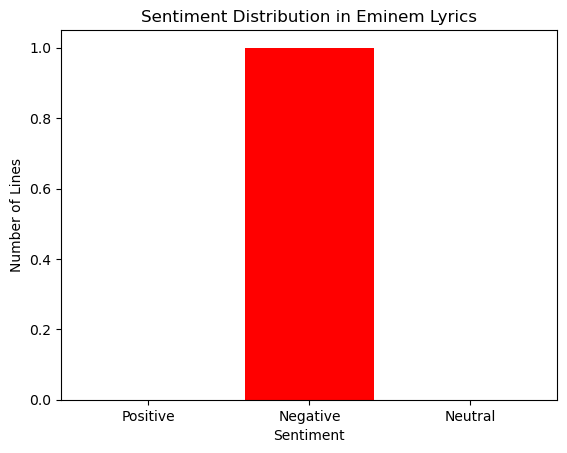

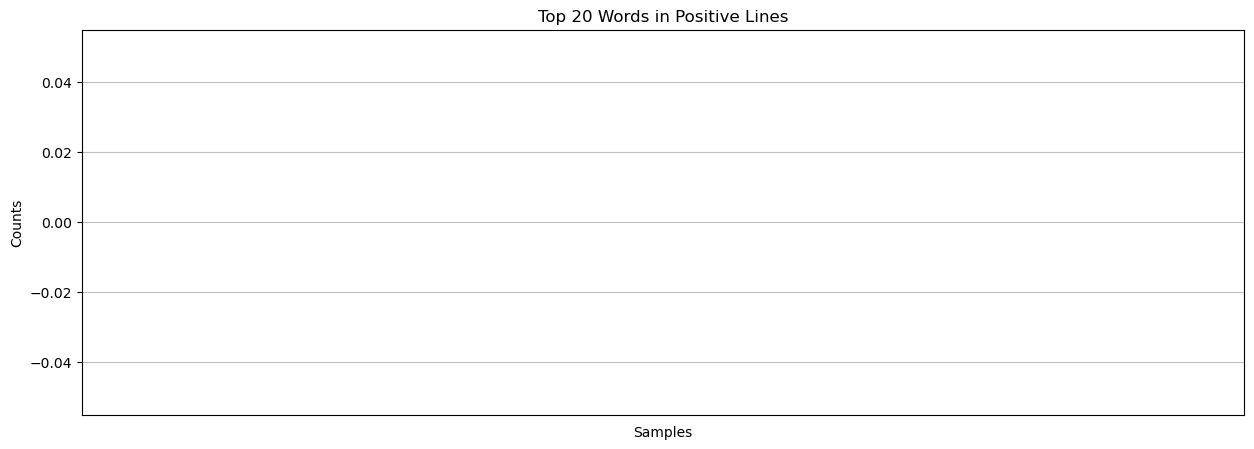

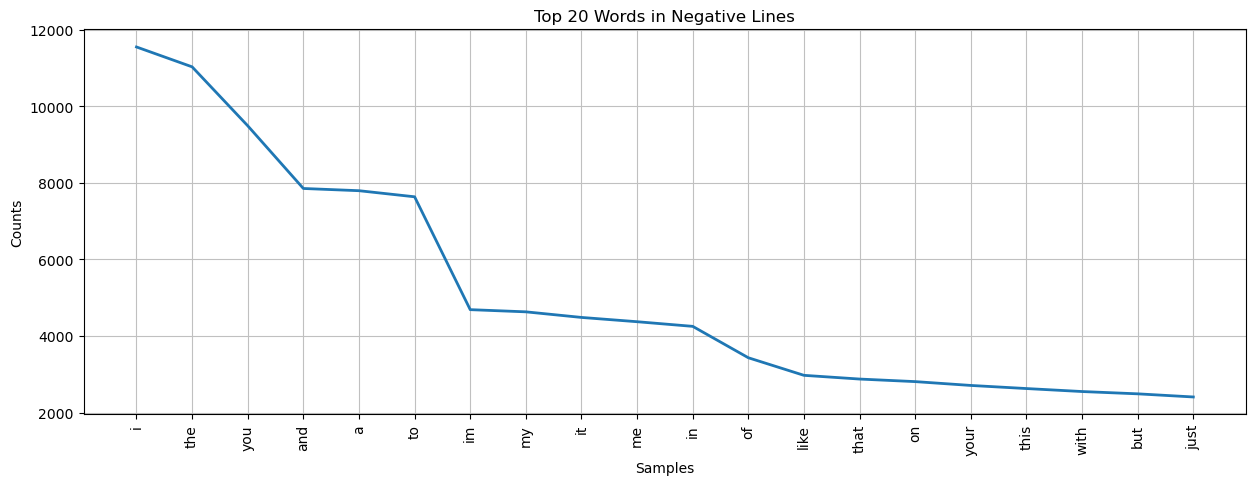

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Load the lyrics from the text file
with open('eminem.txt', 'r', encoding='utf-8') as file:
    lyrics = file.read()

# Split the lyrics into lines
lines = lyrics.split('\n')

# Tokenize the lyrics into words
tokens = word_tokenize(lyrics)

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each line
sentiment_scores = [sia.polarity_scores(line)['compound'] for line in lines]

# Categorize sentiments into positive, negative, and neutral
positive_lines = [line for line, score in zip(lines, sentiment_scores) if score > 0.05]
negative_lines = [line for line, score in zip(lines, sentiment_scores) if score < -0.05]
neutral_lines = [line for line, score in zip(lines, sentiment_scores) if -0.05 <= score <= 0.05]

# Print the number of lines in each sentiment category
print(f"Number of Positive Lines: {len(positive_lines)}")
print(f"Number of Negative Lines: {len(negative_lines)}")
print(f"Number of Neutral Lines: {len(neutral_lines)}")

# Plot a bar chart of sentiment distribution
sentiment_distribution = {'Positive': len(positive_lines), 'Negative': len(negative_lines), 'Neutral': len(neutral_lines)}
plt.bar(sentiment_distribution.keys(), sentiment_distribution.values(), color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution in Eminem Lyrics')
plt.xlabel('Sentiment')
plt.ylabel('Number of Lines')
plt.show()

# Generate a word frequency distribution for positive and negative lines
positive_tokens = word_tokenize(' '.join(positive_lines))
negative_tokens = word_tokenize(' '.join(negative_lines))

fd_positive = FreqDist(positive_tokens)
fd_negative = FreqDist(negative_tokens)

# Plot word frequency distribution for positive and negative lines
plt.figure(figsize=(15, 5))
fd_positive.plot(20, title='Top 20 Words in Positive Lines', cumulative=False)
plt.show()

plt.figure(figsize=(15, 5))
fd_negative.plot(20, title='Top 20 Words in Negative Lines', cumulative=False)
plt.show()


Number of Positive Lines: 0
Number of Negative Lines: 1
Number of Neutral Lines: 0


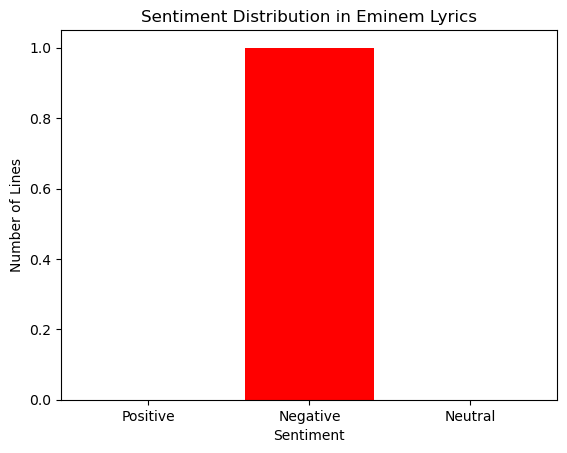

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

# Load the lyrics from the text file
with open('eminem.txt', 'r', encoding='utf-8') as file:
    lyrics = file.read()

# Split the lyrics into lines
lines = lyrics.split('\n')

# Tokenize the lyrics into words
tokens = word_tokenize(lyrics)

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each line
sentiment_scores = [sia.polarity_scores(line)['compound'] for line in lines]

# Categorize sentiments into positive, negative, and neutral
positive_lines = [line for line, score in zip(lines, sentiment_scores) if score > 0.05]
negative_lines = [line for line, score in zip(lines, sentiment_scores) if score < -0.05]
neutral_lines = [line for line, score in zip(lines, sentiment_scores) if -0.05 <= score <= 0.05]

# Print the number of lines in each sentiment category
print(f"Number of Positive Lines: {len(positive_lines)}")
print(f"Number of Negative Lines: {len(negative_lines)}")
print(f"Number of Neutral Lines: {len(neutral_lines)}")

# Plot a bar chart of sentiment distribution
sentiment_distribution = {'Positive': len(positive_lines), 'Negative': len(negative_lines), 'Neutral': len(neutral_lines)}
plt.bar(sentiment_distribution.keys(), sentiment_distribution.values(), color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution in Eminem Lyrics')
plt.xlabel('Sentiment')
plt.ylabel('Number of Lines')
plt.show()


In [8]:
import string

def find_special_characters(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            special_characters = set(content) - set(string.printable)
            if special_characters:
                print("Special characters found:")
                for char in special_characters:
                    print(f"{char} (Unicode: {ord(char)})")
            else:
                print("No special characters found.")
    except FileNotFoundError:
        print(f"The file {file_path} was not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

find_special_characters(file_path)

Special characters found:
  (Unicode: 160)
  (Unicode: 8202)
  (Unicode: 8197)
  (Unicode: 8287)


Process the text
Vectorize the text
Before training, you need to convert the strings to a numerical representation.

The tf.keras.layers.StringLookup layer can convert each character into a numeric ID. It just needs the text to be split into tokens first.

This layer is commonly used in natural language processing tasks where text data needs to be converted into a format that a neural network can process, using integers instead of raw text

In [9]:
ids_from_chars = tf.keras.layers.StringLookup(
    vocabulary=list(vocab), mask_token=None)

In [19]:
#EXAMPLE converting string to integer and integer back to string
example_texts = ['abcdefg', 'xyz']

chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')

ids = ids_from_chars(chars)
print(ids)
print()

chars_from_ids = tf.keras.layers.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

chars = chars_from_ids(ids)
print(chars)
print()
tf.strings.reduce_join(chars, axis=-1).numpy()

<tf.RaggedTensor [[12, 13, 14, 15, 16, 17, 18], [35, 36, 37]]>

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>



array([b'abcdefg', b'xyz'], dtype=object)

In [16]:
# NOW ORIGINAL TEXT
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids

<tf.Tensor: shape=(1668013,), dtype=int64, numpy=array([ 1, 30, 19, ..., 16, 12, 17], dtype=int64)>

In [20]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)
for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

 
s
h
s
h
s
h
 
s
h


In [22]:
#  It converts each batch of ID sequences into characters and prints the result for the first batch. 
# The use of batches is common in machine learning, where models are often trained on sequences of data rather than individual data points.
seq_length = 50
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b' ' b's' b'h' b's' b'h' b's' b'h' b' ' b's' b'h' b'a' b'd' b'y' b' '
 b'a' b'f' b't' b'e' b'r' b'm' b'a' b't' b'h' b' ' b'h' b'a' b'h' b'a'
 b' ' b'g' b'g' b'g' b'g' b' ' b'g' b'u' b'n' b'i' b't' b' ' b'h' b'a'
 b'h' b'a' b' ' b' ' b' ' b'c' b'a' b'u' b's'], shape=(51,), dtype=string)


In [24]:
def text_from_ids(ids):
    return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

b' shshsh shady aftermath haha gggg gunit haha   caus'
b'e we came here to set this party off right lets bou'
b'nce tonight and if they dont let us in through the '
b'front well come through the side cause i dont ever '
b'wanna leave the game without at least saying goodby'


In [25]:
# This is a common pattern when working with sequential data, like in training a model 
# to predict the next element in a sequence.
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [26]:
#EXAMPLE
split_input_target(list("Tensorflow"))

(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

In [27]:
dataset = sequences.map(split_input_target)
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : b' shshsh shady aftermath haha gggg gunit haha   cau'
Target: b'shshsh shady aftermath haha gggg gunit haha   caus'


Create training batches
prepare the dataset for training by shuffling, batching, and prefetching the data for better performance.

In [39]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 50), dtype=tf.int64, name=None), TensorSpec(shape=(64, 50), dtype=tf.int64, name=None))>

In [40]:
# Length of the vocabulary in StringLookup Layer
vocab_size = len(ids_from_chars.get_vocabulary())

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

This model has three layers:

tf.keras.layers.Embedding: The input layer. A trainable lookup table that will map each character-ID to a vector with embedding_dim dimensions;
tf.keras.layers.GRU: A type of RNN with size units=rnn_units (You can also use an LSTM layer here.)

tf.keras.layers.Dense: The output layer, with vocab_size outputs. It outputs one logit for each character in the vocabulary. These are the log-likelihood of each character according to the model.

This type of architecture is commonly used in natural language processing tasks like text generation or language modeling.
It uses an embedding layer to convert input words into vectors, a GRU layer to capture sequential patterns, and a dense layer to produce the final output(generate logits predicting the log-likelihood of the next character:)

In [43]:
class MyModel(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, rnn_units):
        super().__init__(self)
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
        self.dense = tf.keras.layers.Dense(vocab_size)

    def call(self, inputs, states=None, return_state=False, training=False):
        x = inputs
        x = self.embedding(x, training=training)
        if states is None:
            states = self.gru.get_initial_state(x)
        x, states = self.gru(x, initial_state=states, training=training)
        x = self.dense(x, training=training)

        if return_state:
            return x, states
        else:
            return x

In [44]:
model = MyModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [45]:
# trying to check the shape of the output


In [46]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

# In the above example the sequence length of the input is 100 but the model can be run on inputs of any length

(64, 50, 42) # (batch_size, sequence_length, vocab_size)


In [47]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  10752     
                                                                 
 gru (GRU)                   multiple                  3938304   
                                                                 
 dense (Dense)               multiple                  43050     
                                                                 
Total params: 3992106 (15.23 MB)
Trainable params: 3992106 (15.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# sampling random indices for each prediction in the first sequence of your batch and
# then converting the result to a NumPy array for easier manipulation.
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()

In [49]:
sampled_indices

array([34, 14, 26, 31,  9,  5, 24, 41, 32, 40, 22,  9, 41, 18, 36, 17, 10,
       34, 37,  9,  9,  8, 26, 39,  9, 31, 16,  4, 14, 14, 28, 36, 31,  1,
        7, 33, 28, 39,  3, 12, 26, 28, 25, 24, 19, 38,  2, 38, 10, 30],
      dtype=int64)

In [50]:
# Decode these to see the text predicted by this untrained model:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

Input:
 b'e beams of energy rays menacing stares he glares m'

Next Char Predictions:
 b'wcot73m\xe2\x81\x9fu\xe2\x80\x8ak7\xe2\x81\x9fgyf8wz776o\xe2\x80\x857te2ccqyt 5vq\xe2\x80\x851aoqnmh\xc2\xa00\xc2\xa08s'


Train the model

The loss indicates how well the model's predictions match the actual labels, and minimizing this loss is the objective during the training of a machine learning model.

Adam is an optimization algorithm used to minimize the loss function during training. It adjusts the model's weights to improve its performance.

In [52]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [53]:
example_batch_mean_loss = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", example_batch_mean_loss)

Prediction shape:  (64, 50, 42)  # (batch_size, sequence_length, vocab_size)
Mean loss:         tf.Tensor(3.7373962, shape=(), dtype=float32)


In [54]:
tf.exp(example_batch_mean_loss).numpy()

41.98852

In [55]:
model.compile(optimizer='adam', loss=loss)

this code compiles a neural network model, prepares a directory to save checkpoints, and configures a callback to save the model's weights at the end of each training epoch. Checkpoints are useful for resuming training, evaluating the model's performance at different stages, or deploying the model for inference.

In [56]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [57]:
EPOCHS = 20
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/20
511/511 [==============================] - 850s 2s/step - loss: 2.1341
Epoch 2/20
511/511 [==============================] - 789s 2s/step - loss: 1.6074
Epoch 3/20
511/511 [==============================] - 779s 2s/step - loss: 1.4456
Epoch 4/20
511/511 [==============================] - 810s 2s/step - loss: 1.3442
Epoch 5/20
511/511 [==============================] - 773s 2s/step - loss: 1.2573
Epoch 6/20
511/511 [==============================] - 769s 2s/step - loss: 1.1744
Epoch 7/20
511/511 [==============================] - 767s 1s/step - loss: 1.0945
Epoch 8/20
511/511 [==============================] - 769s 2s/step - loss: 1.0192
Epoch 9/20
511/511 [==============================] - 769s 2s/step - loss: 0.9523
Epoch 10/20
511/511 [==============================] - 785s 2s/step - loss: 0.8971
Epoch 11/20
511/511 [==============================] - 767s 1s/step - loss: 0.8526
Epoch 12/20
511/511 [==============================] - 775s 2s/step - loss: 0.8188
Epoch 13/20
5

In [59]:
class OneStep(tf.keras.Model):
    def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
        super().__init__()
        self.temperature = temperature
        self.model = model
        self.chars_from_ids = chars_from_ids
        self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
        skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
        sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
            values=[-float('inf')]*len(skip_ids),
            indices=skip_ids,
        # Match the shape to the vocabulary
            dense_shape=[len(ids_from_chars.get_vocabulary())])
        self.prediction_mask = tf.sparse.to_dense(sparse_mask)

    @tf.function
    def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
        input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
        input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
        predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
        predicted_logits = predicted_logits[:, -1, :]
        predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
        predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
        predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
        predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
        predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
        return predicted_chars, states

In [60]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

In [61]:
start = time.time()
states = None
next_char = tf.constant(['Slim Shady'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

Slim Shadys bitch are gone calison in the land transin at home and leave fought school shit yeah   i went to give you a dick you aint sold your sight off  hi my name is my name aint the shower considence again imagination and that was shit i mean most knock your throat cut i forgot your whole nother so you might switch nothing money is what yeah they said im thankful for the felt so much man i cant see screws it up its part to this youre a fact im a  what we made this beat robitics opened the violence of little thing is survival of the block and theyre like course on womey welonedies i slow ased them andres really toround and the lotto fad its goin she wants to go from seoon honest place until you feelin and expire  these are though that its ursuck to hiphop these fuckin hit with the the up was buttfuckin cocked caint when you need is buildin around in shit aint nothin no more ahh dumdedun ayo   im at your throat i love you but i remain this is someones too easy when you eat your momma

In [62]:
start = time.time()
states = None
next_char = tf.constant(['ROMEO:', 'ROMEO:', 'ROMEO:', 'ROMEO:', 'ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result, '\n\n' + '_'*80)
print('\nRun time:', end - start)

tf.Tensor(
[b'ROMEO:re youve was the one they adore who the fuck im famous and i got too many of us and leave me alone look my facelister  who look off shit god  spray for me were freard the alarm im crazy as i lay uh about the ass will annthieh but every time i take a strong rhyme to step in twother   im sorry man i know you still have another faithurpuz with a parental ass legged infin teniel flashin girl at my conscience as me when im at leaning standin by with it if i could talk about you you let me crash you mustve runnin out on you bitches by the datch of next morning bars im nonmin up cmon down to your chest is all of this hell ill be the hospital preacher talk about it im surrout at night christopher reeves your padardan kzp trayers in laston and i bust and throw your craimers you better voices i hold yall mean right at you right at you always doing whiph fuck i smoke a fat worse whats this jurt of rappers get is smoked and of tryin to step because all you get being clothes and

In [63]:
tf.saved_model.save(one_step_model, 'one_step')
one_step_reloaded = tf.saved_model.load('one_step')

INFO:tensorflow:Assets written to: one_step\assets


INFO:tensorflow:Assets written to: one_step\assets


In [64]:
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]

for n in range(100):
  next_char, states = one_step_reloaded.generate_one_step(next_char, states=states)
  result.append(next_char)

print(tf.strings.join(result)[0].numpy().decode("utf-8"))

ROMEO:man soon as my ford guessines spidermmak iin ayory fools just dont shit if you experited around it l
